In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo

In [125]:
cosmo.age(0)

<Quantity 13.7976159 Gyr>

In [2]:
all_rprof_halos = {}
for halo in ['5016', '8508', '5036', '4123', '2392', '2878']:
    print (halo)
    profdir = '/Users/rsimons/Dropbox/foggie/angular_momentum/profiles/%s'%halo
    all_rprof_fname = profdir + '/' + 'all_rprof_%s.npy'%halo
    all_rprof_halos[halo] = np.load(all_rprof_fname, allow_pickle = True)[()]


5016
8508
5036
4123
2392
2878


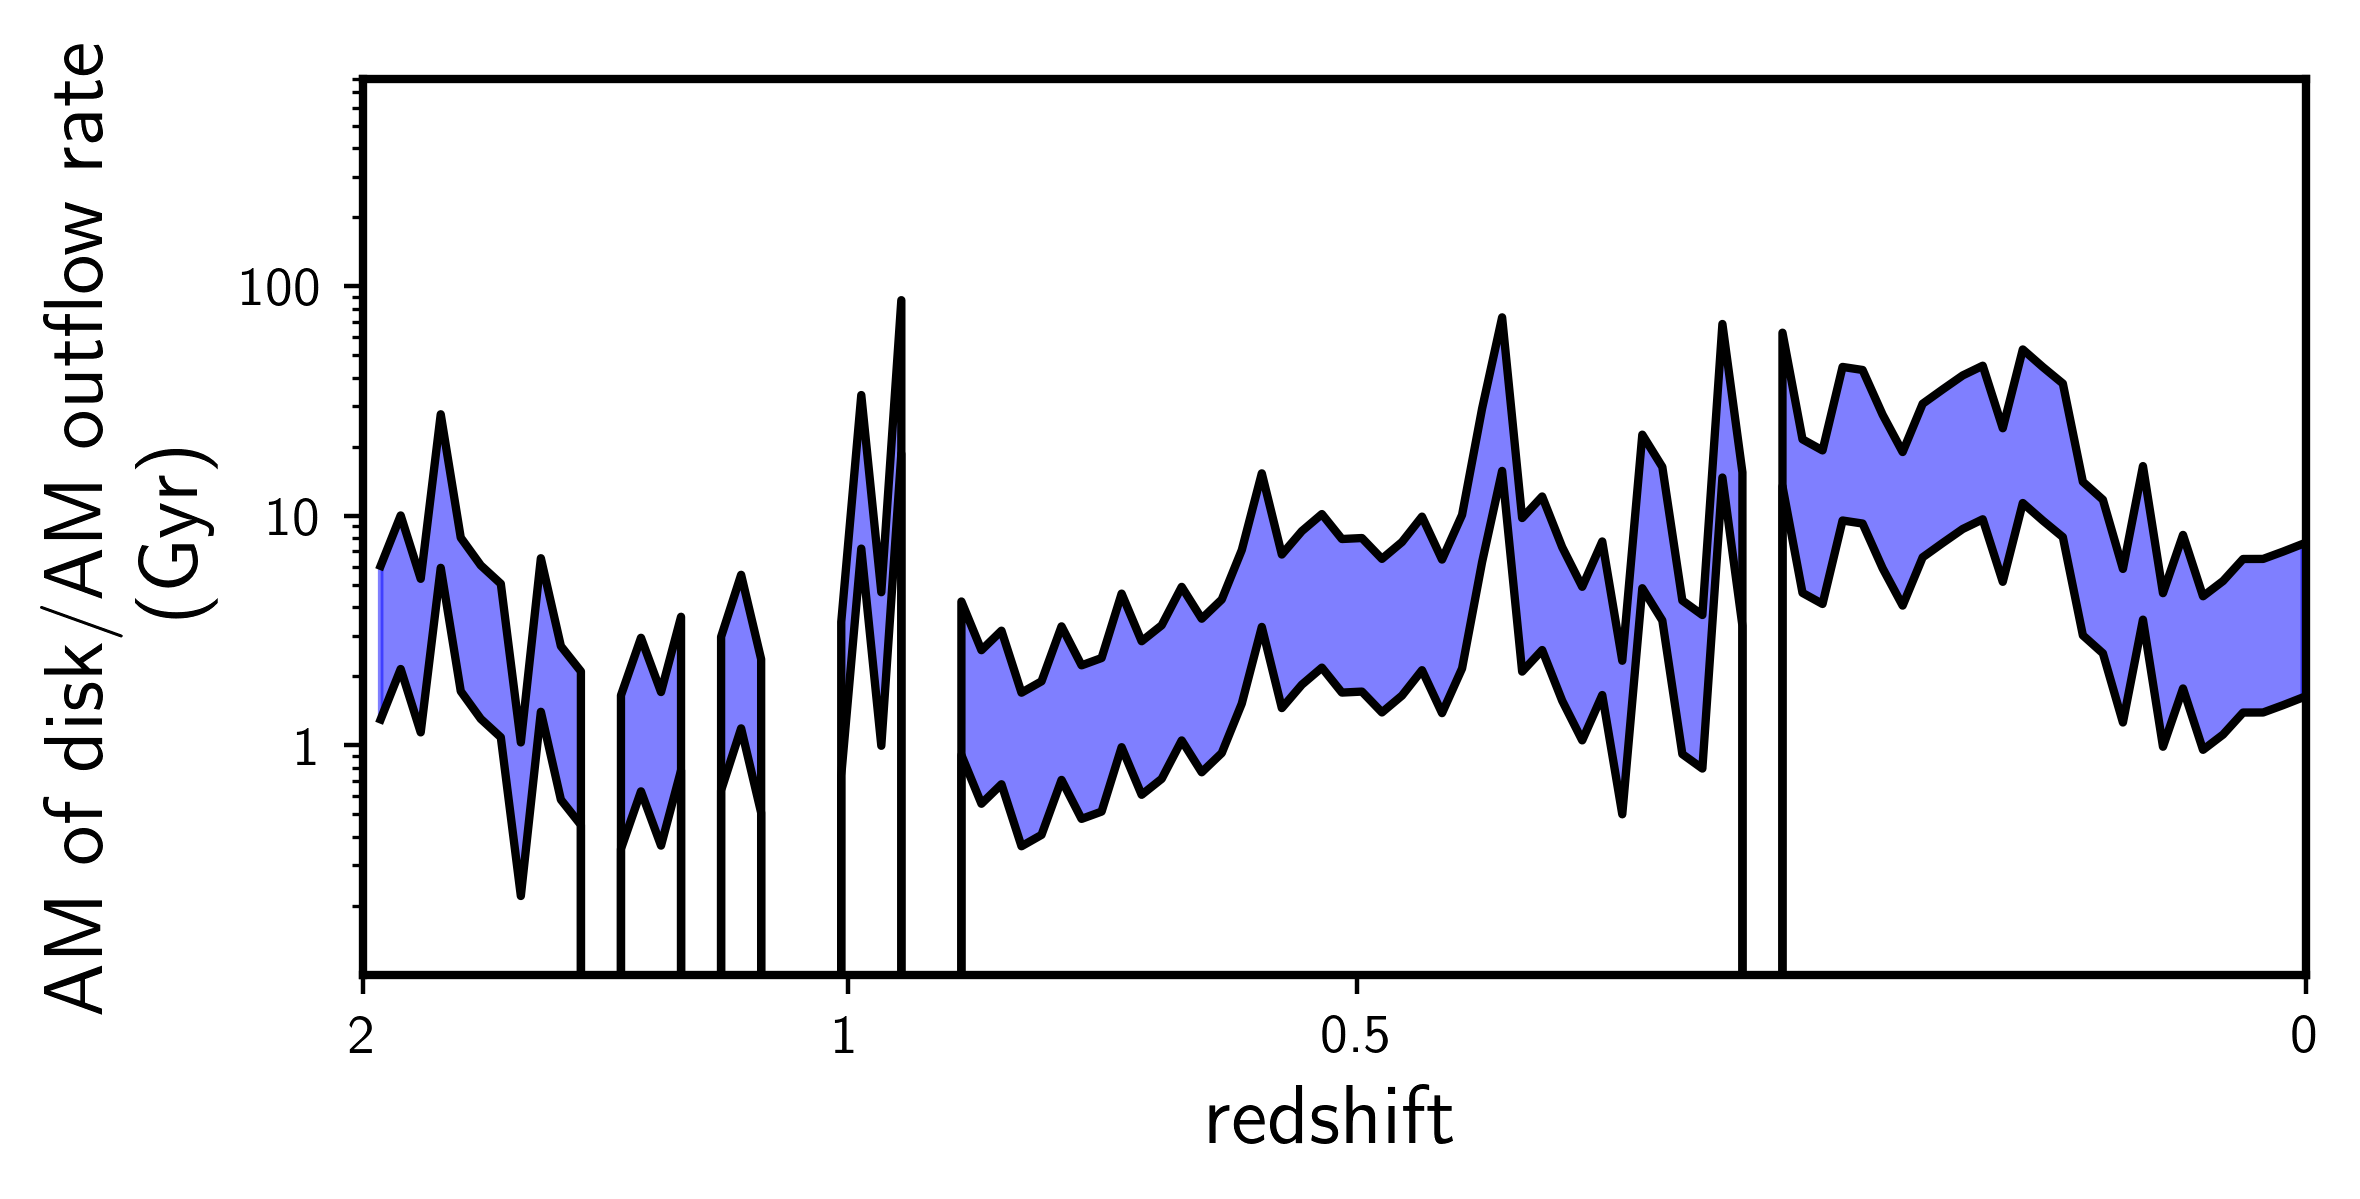

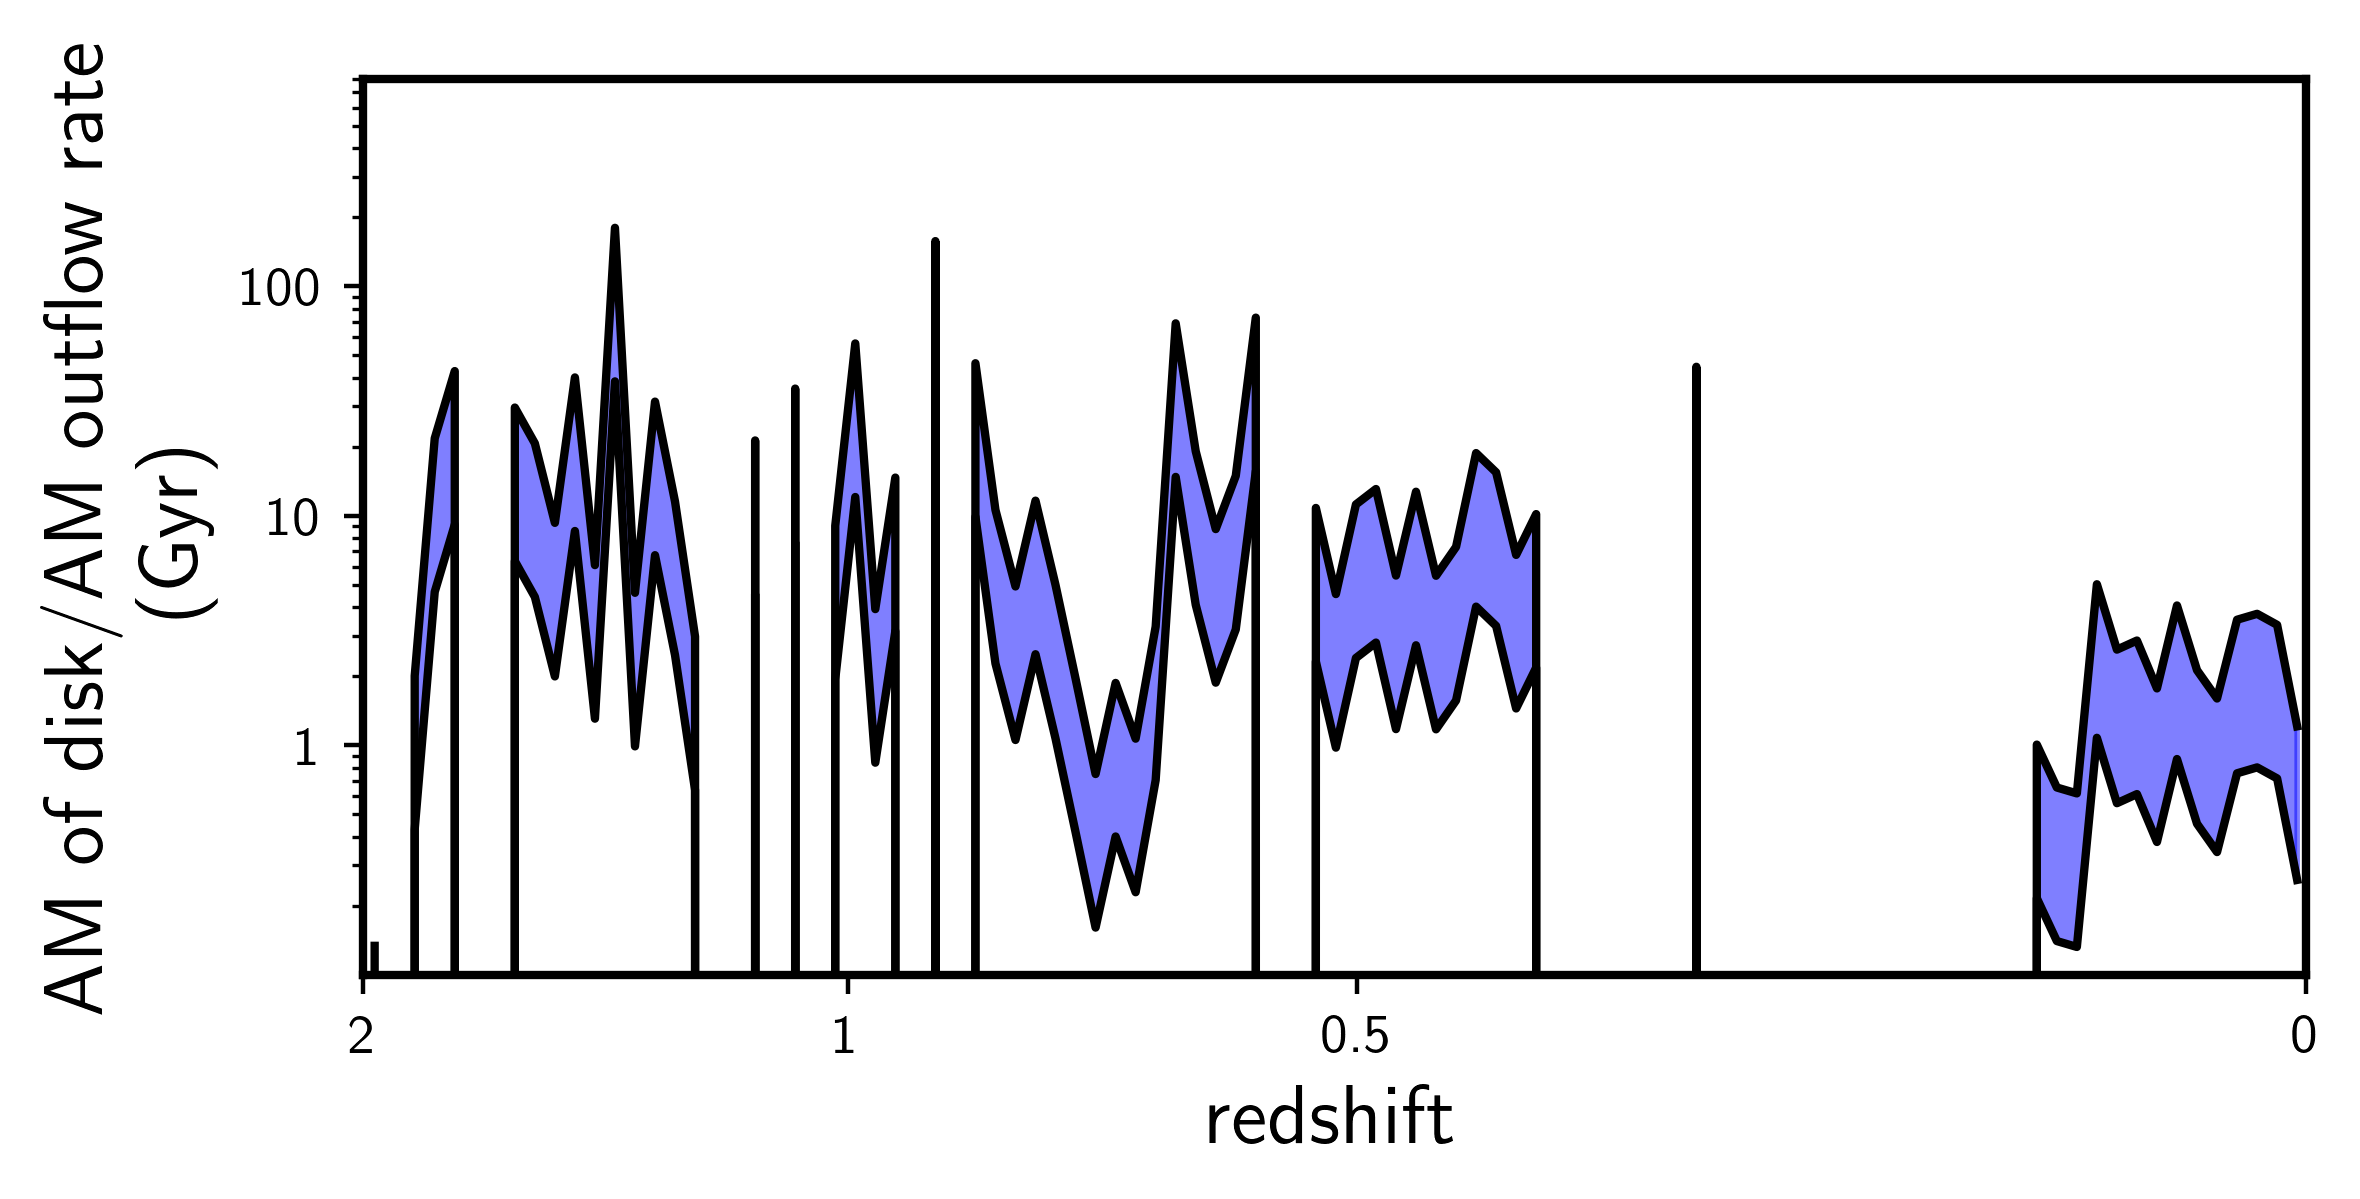

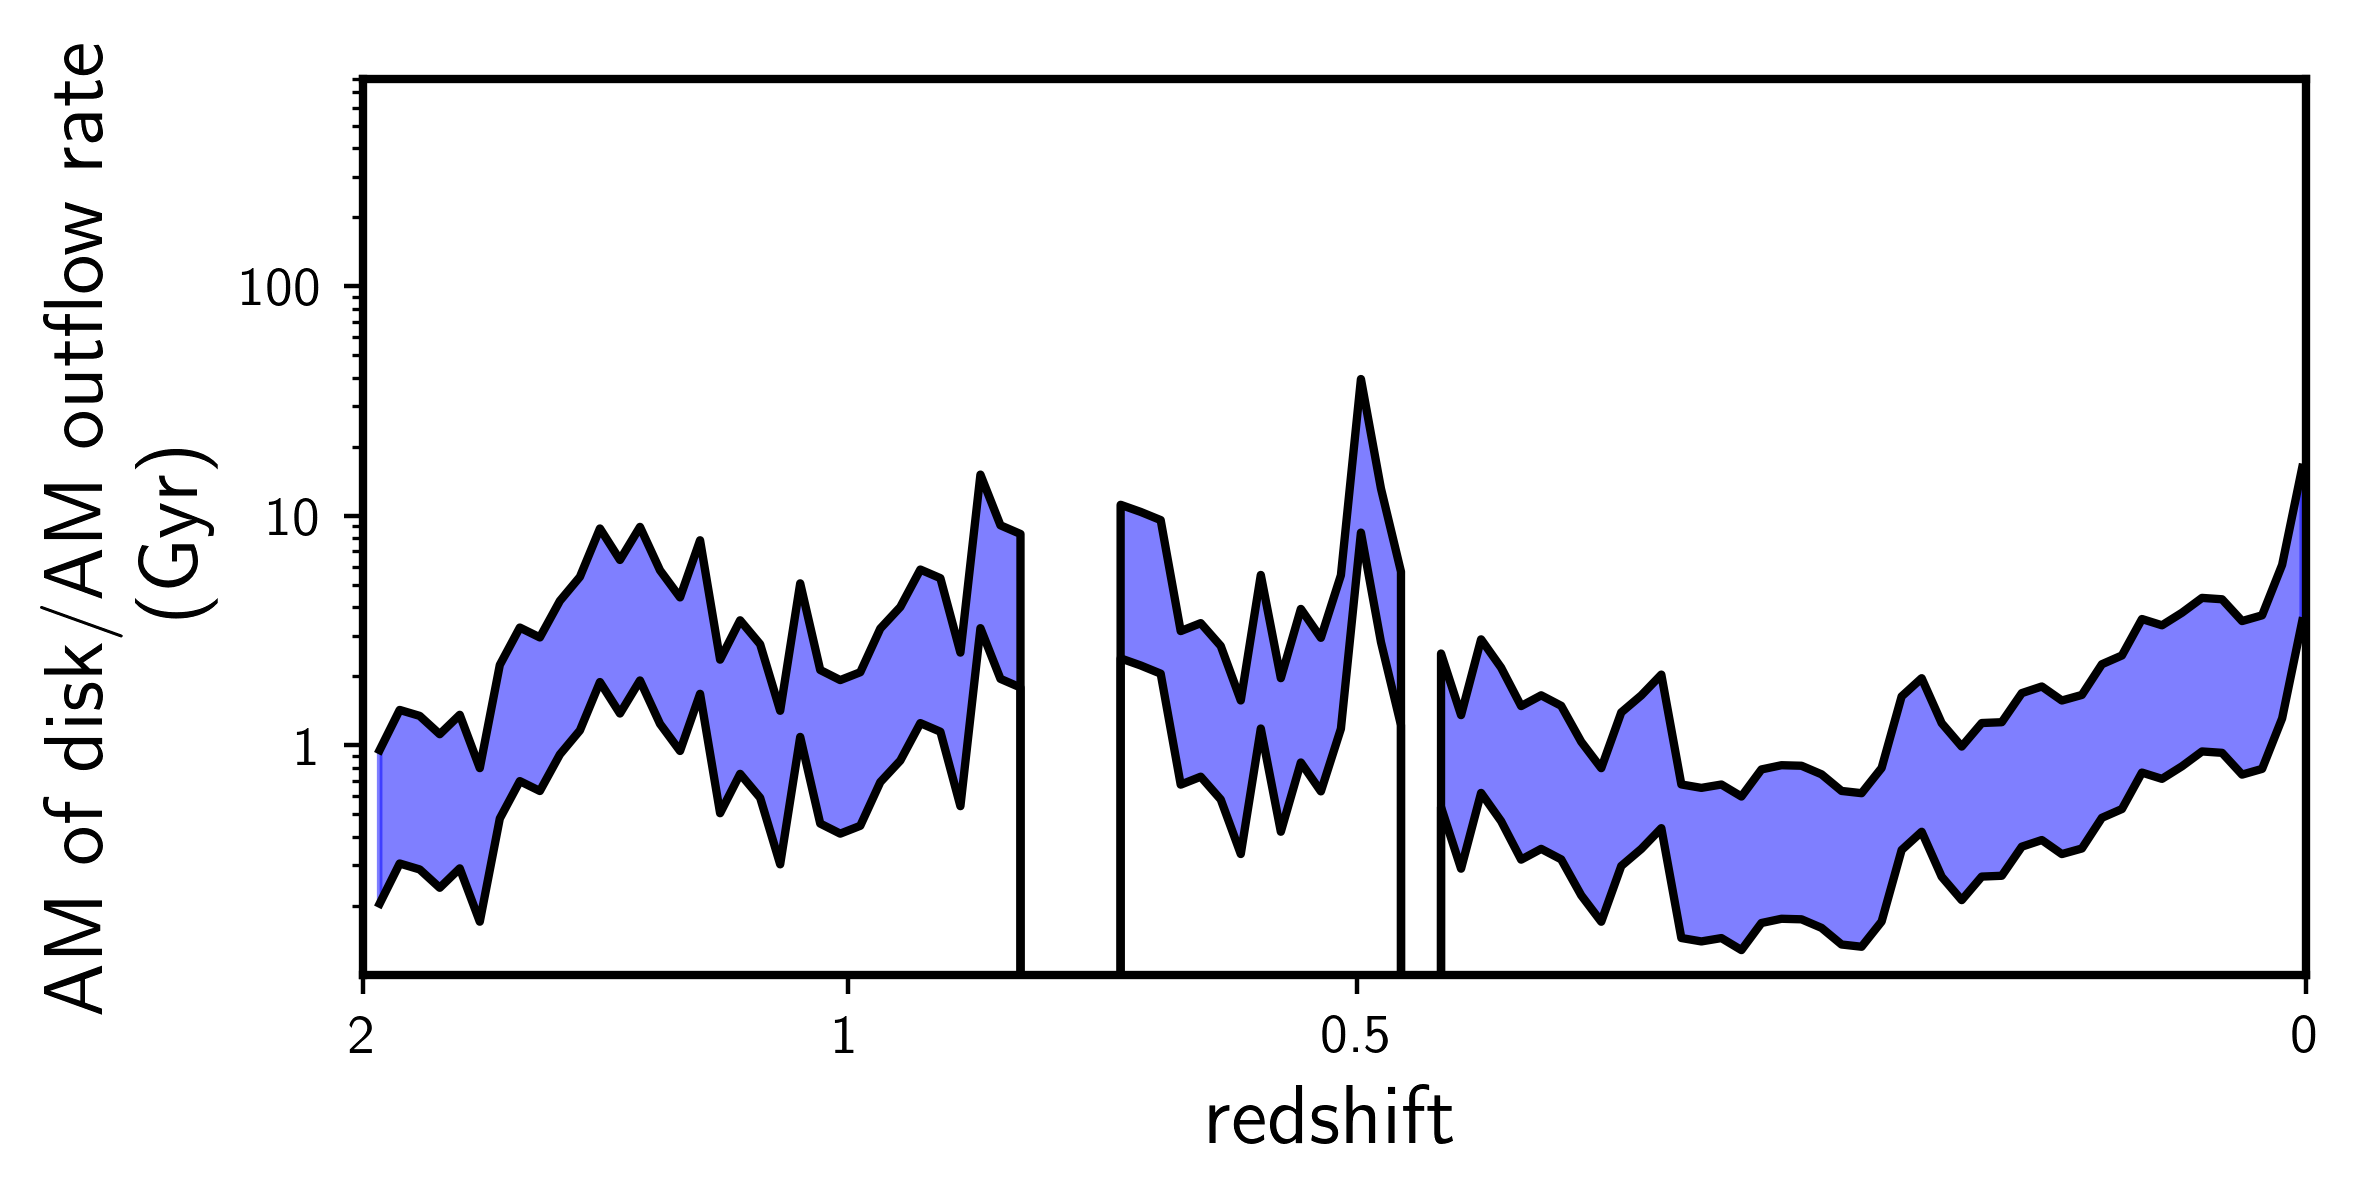

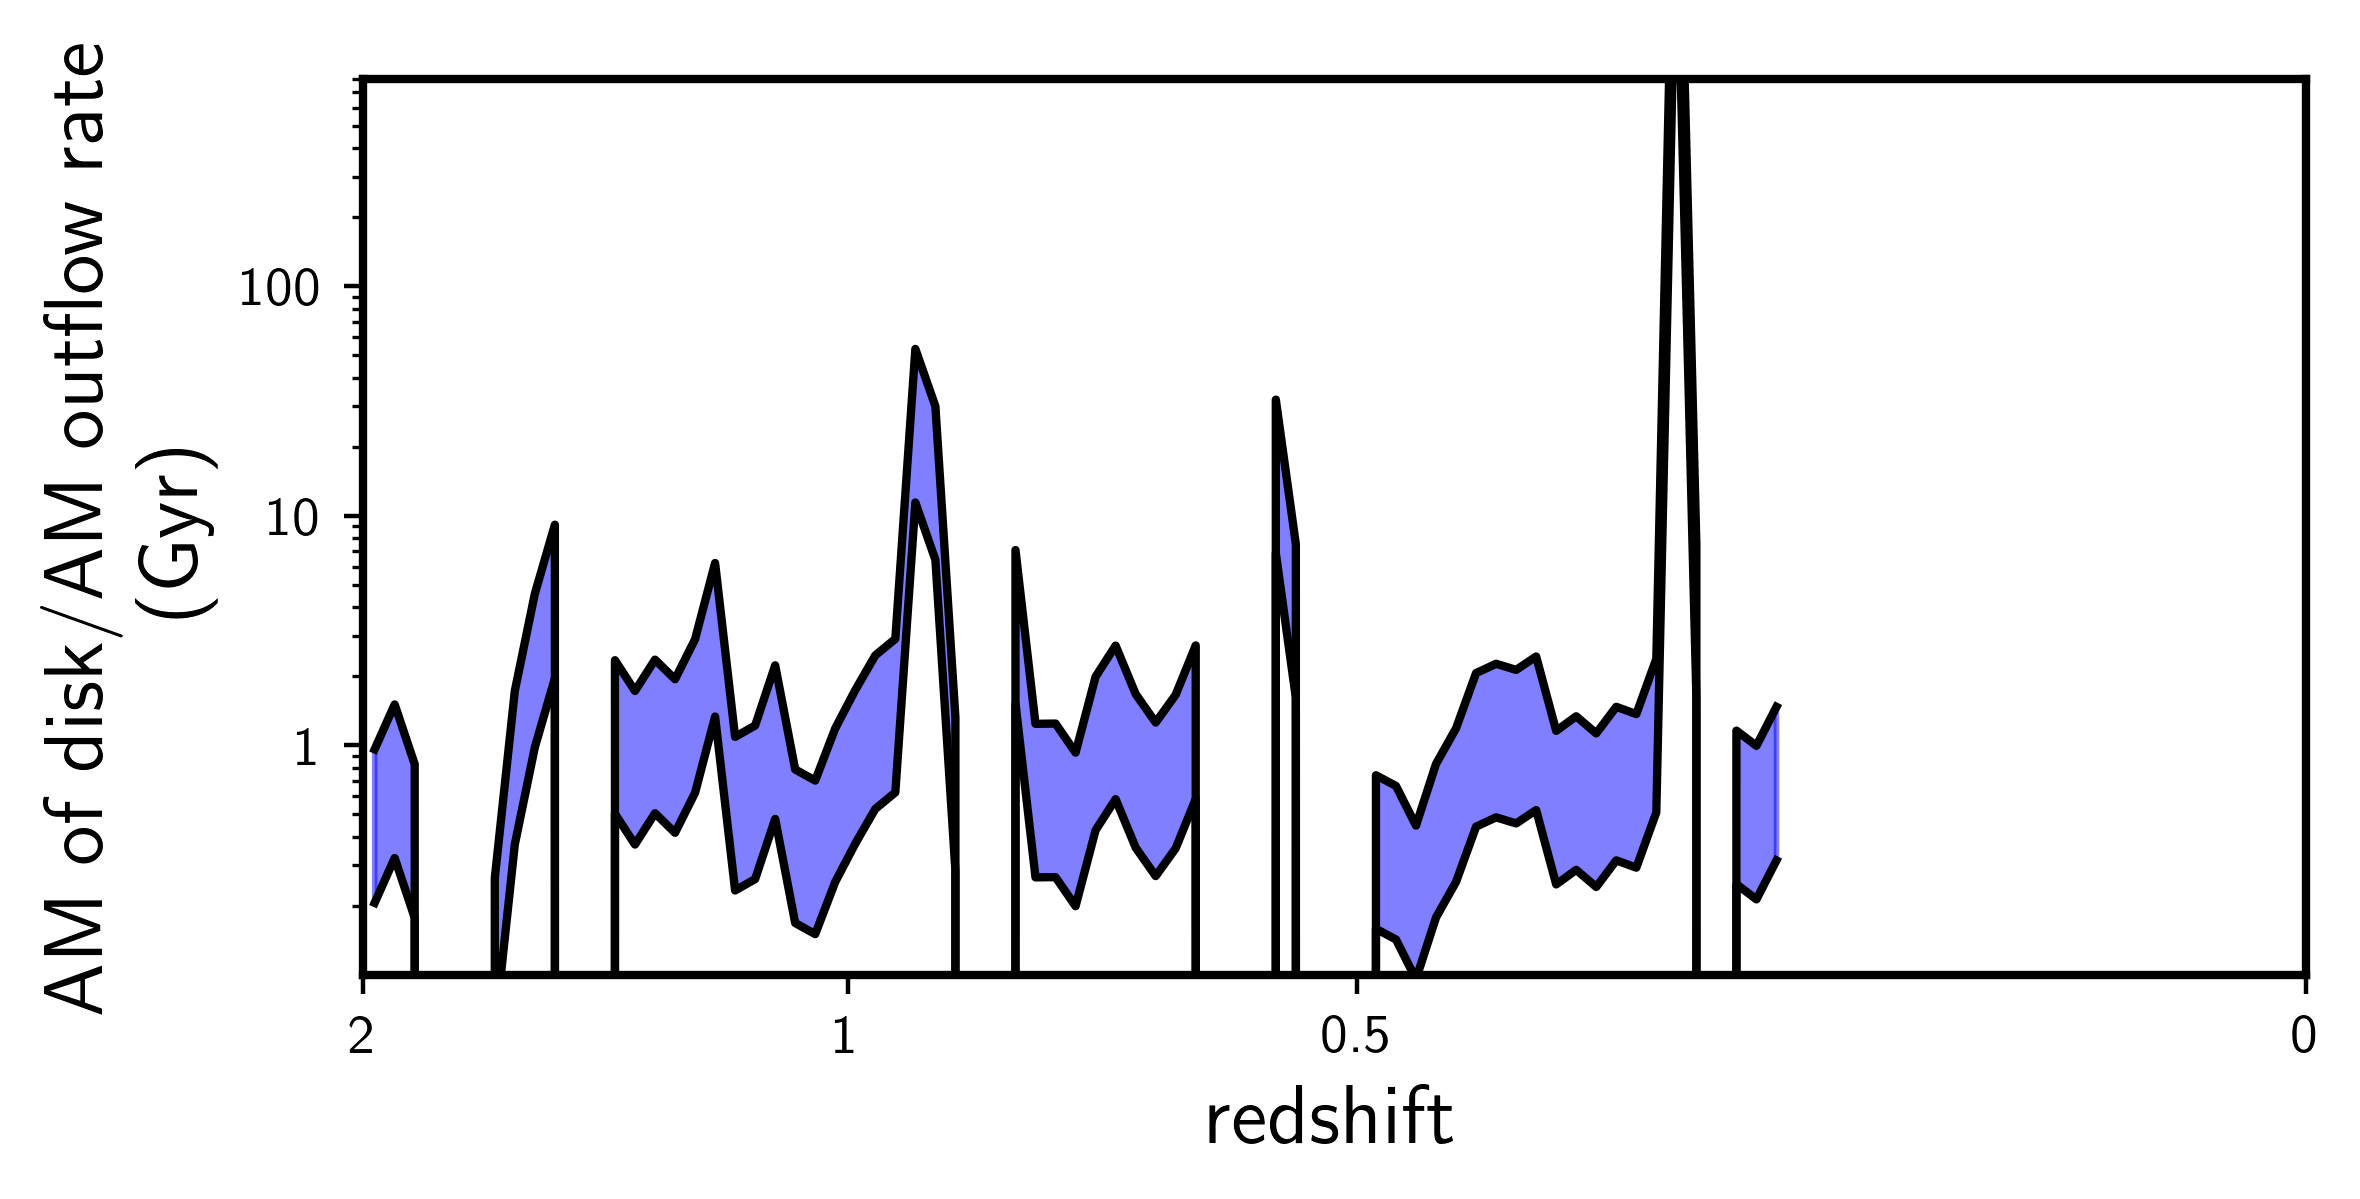

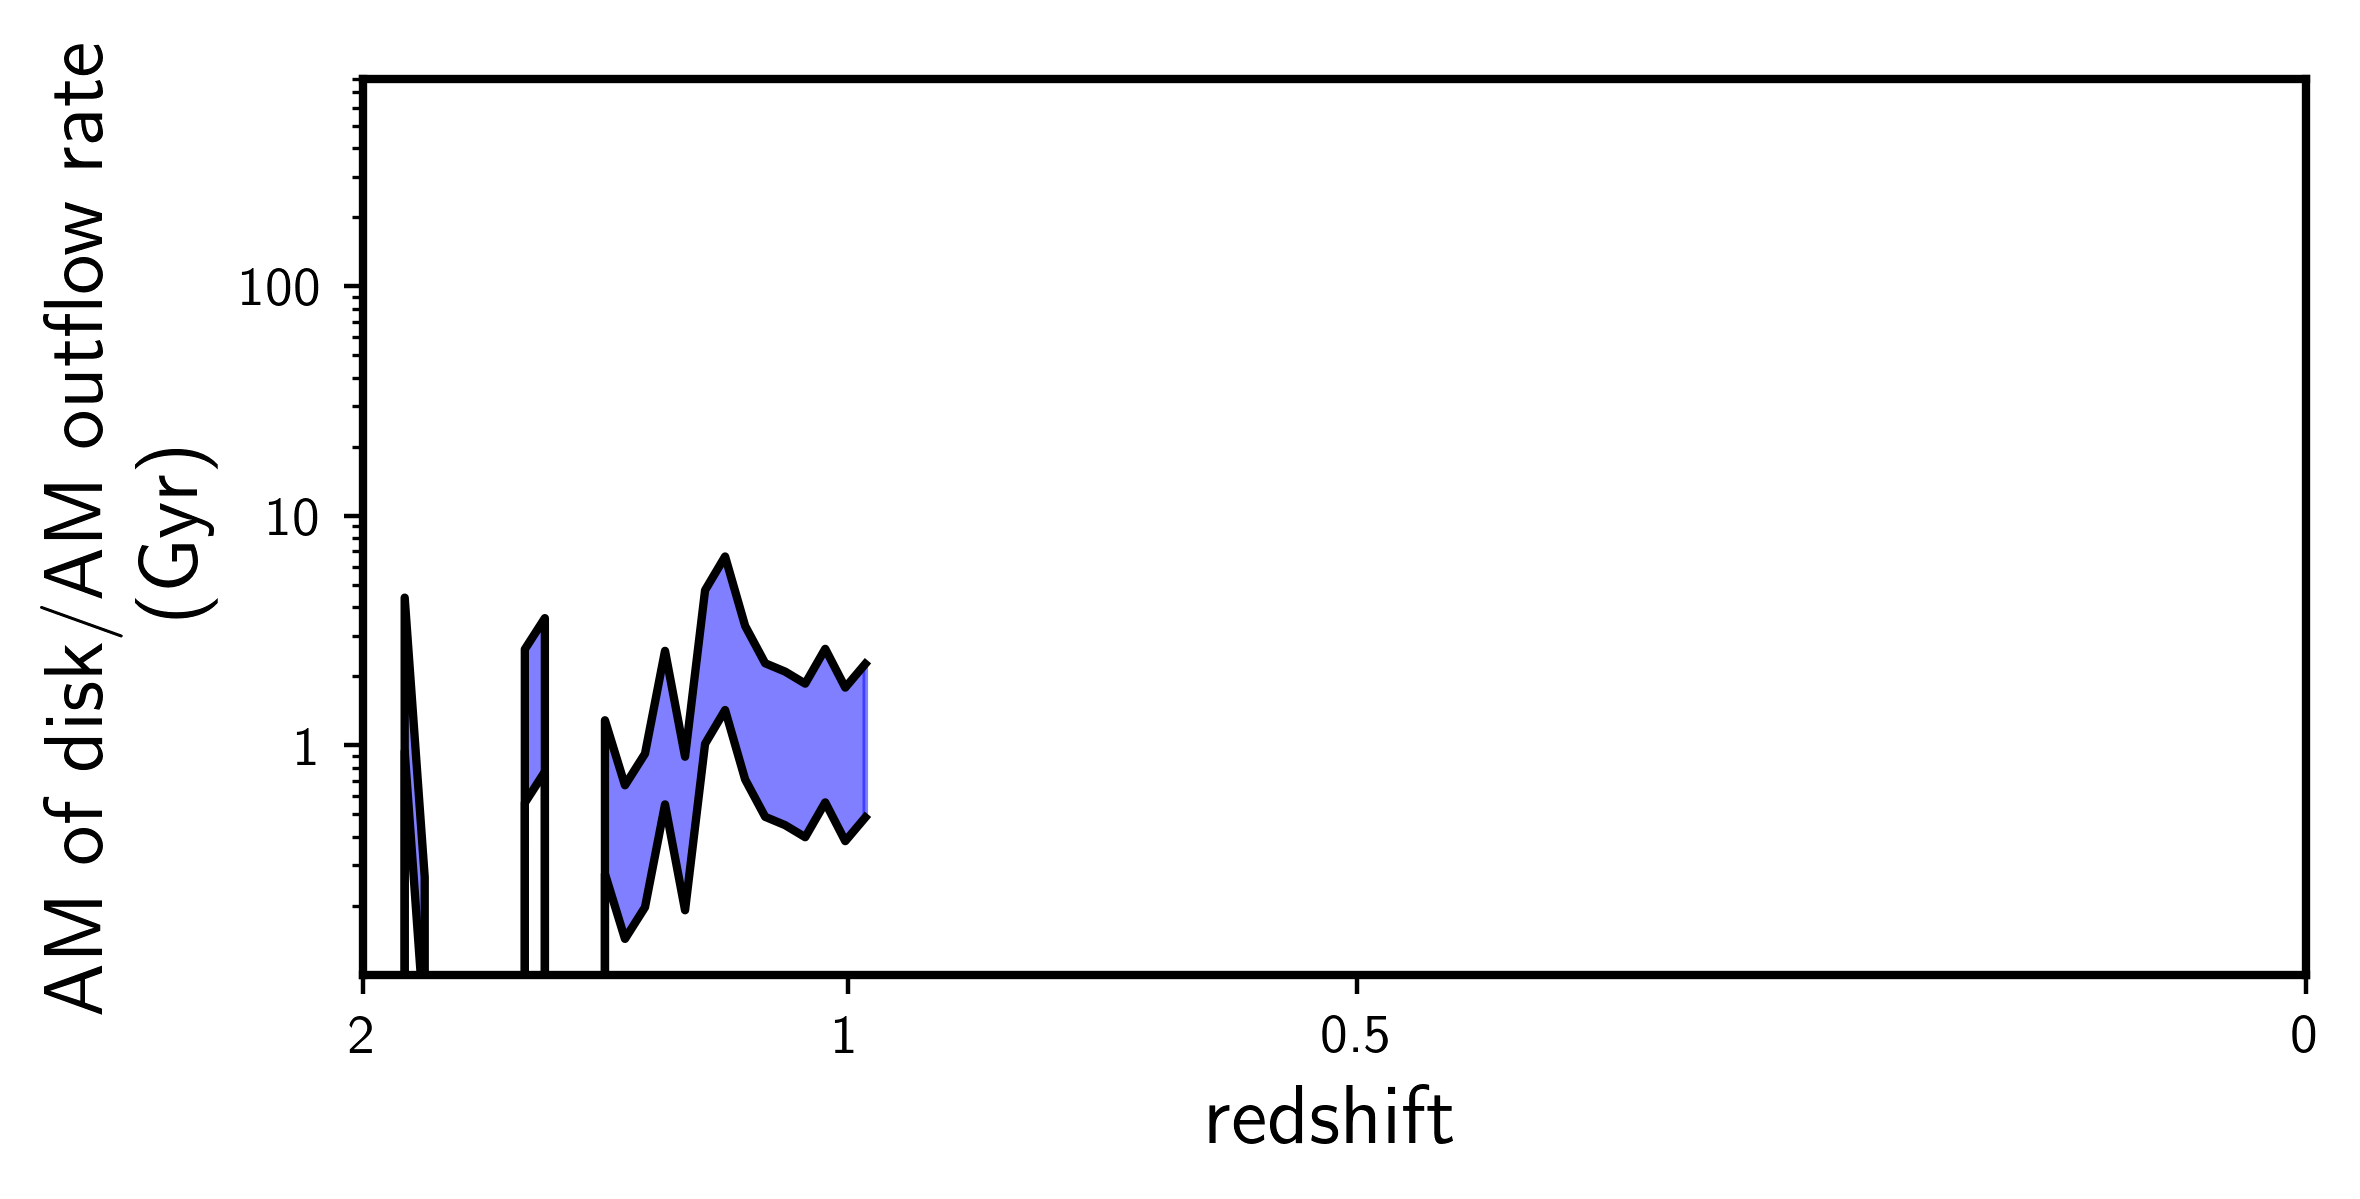

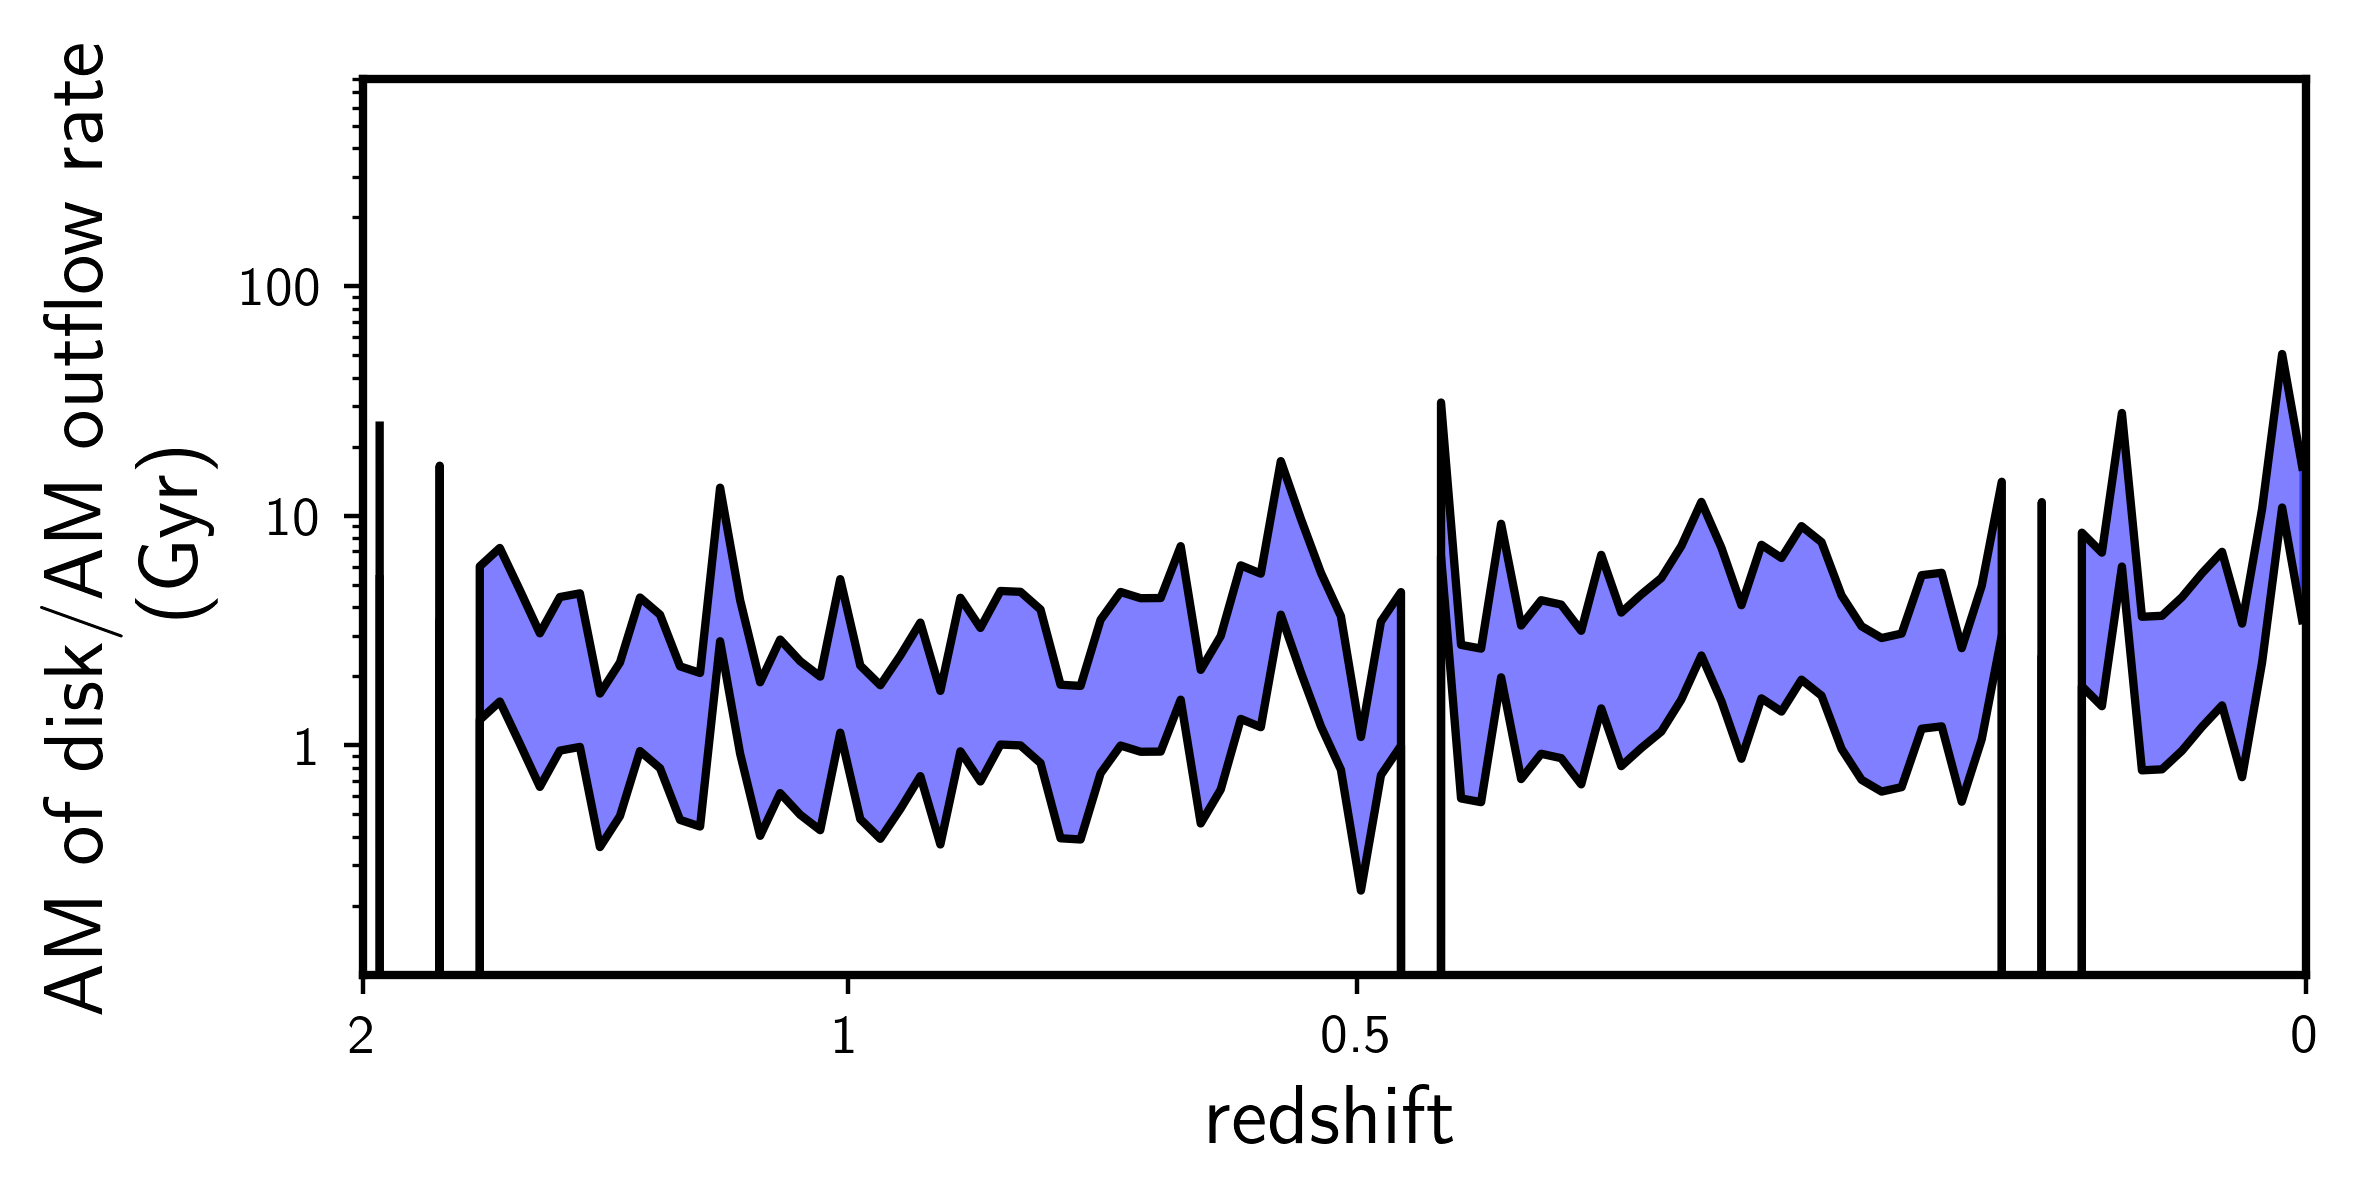

In [168]:
halo = '8508'
for halo in ['8508', '5016', '4123', '2392', '2878', '5036']:
    all_rprof   = all_rprof_halos[halo]
    DDs = list(all_rprof.keys())

    if halo == '8508': 
        DDz2  = 486
        DDz1  = 971
        DDz05 = 1479
        DDz0  = 2427

    else: 
        DDz2  = 579
        DDz1  = 1064
        DDz05 = 1572
        DDz0  = 2520        
    cmap = cm.viridis
    tdepl_min_all = []
    tdepl_max_all = []
    DD_all     = []
    sfr_all    = []
    for DD in DDs[::20]:
        if int(DD) < DDz2: continue
        #SFR inside 10 kpc
        young_stars = all_rprof[DD]['young_stars']
        hot         = all_rprof[DD]['hot']
        cold        = all_rprof[DD]['cold']

        sfr                = float(sum(young_stars['mass'][:20]).value)/(10.e6)

        disk_Lx            = float(sum(cold['Lx'][:20]).value)
        disk_Ly            = float(sum(cold['Ly'][:20]).value)
        disk_Lz            = float(sum(cold['Lz'][:20]).value)
        disk_L             = np.sqrt(sum([disk_Lx**2, disk_Ly**2, disk_Lz**2]))

        outflow_Lx         = float(sum(hot['Lx'][20:40]).value)
        outflow_Ly         = float(sum(hot['Ly'][20:40]).value)
        outflow_Lz         = float(sum(hot['Lz'][20:40]).value)
        outflow_L          = np.sqrt(sum([outflow_Lx**2, outflow_Ly**2, outflow_Lz**2]))


        disk_new_Lx            = disk_Lx - outflow_Lx
        disk_new_Ly            = disk_Ly - outflow_Ly
        disk_new_Lz            = disk_Lz - outflow_Lz


        disk_new_L             = np.sqrt(sum([(disk_new_Lx)**2, 
                                              (disk_new_Ly)**2, 
                                              (disk_new_Lz)**2]))

        t_min = 10*u.kpc/(150*u.km/u.s)
        t_max = 10*u.kpc/(700*u.km/u.s)

        diff_L_rate_min = (disk_L - disk_new_L)/t_min.to('Gyr')
        diff_L_rate_max = (disk_L - disk_new_L)/t_max.to('Gyr')
        #if disk_new_L > disk_L: continue
        time_depl = diff_L/t_min


        tdepl_min_all.append((0.1*disk_L/diff_L_rate_min).value)
        tdepl_max_all.append((0.1*disk_L/diff_L_rate_max).value)


        DD_all.append(int(DD))
        sfr_all.append(sfr)
    tdepl_min_all = np.array(tdepl_min_all)
    tdepl_max_all = np.array(tdepl_max_all)

    DD_all = np.array(DD_all)

    fig, ax = plt.subplots(1,1, figsize = (6, 3), facecolor = 'white')


    y1s = [(min((tdepl_mn, tdepl_mx))) for (tdepl_mn, tdepl_mx) in zip(tdepl_min_all, tdepl_max_all)]
    y2s = [(max((tdepl_mn, tdepl_mx))) for (tdepl_mn, tdepl_mx) in zip(tdepl_min_all, tdepl_max_all)]


    ax.fill_between(DD_all, y1 = y1s, y2 = y2s, color = 'blue', alpha = 0.5)
    ax.plot(DD_all, tdepl_min_all, 'k-')
    ax.plot(DD_all, tdepl_max_all, 'k-')
    ax.set_xticks([])
    #ax2 = ax.twinx()
    #ax2.plot(DD_all, sfr_all, 'k-')
    ax.set_xticks([DDz2, DDz1, DDz05, DDz0])
    ax.set_xticklabels(['2', '1', '0.5', '0'])
    #ax2.plot(DD_all, sfr_all, 'k-')
    ax.set_ylim(0.1, 800)

    ax.set_xlim(DDz2, DDz0)
    ax.set_yscale('log')
    ax.set_yticks([1, 10, 100])
    ax.set_yticklabels(['1', '10', '100'])
    ax.set_xlabel('redshift')
    ax.set_ylabel('AM of disk/AM outflow rate\n(Gyr)')

    fig.set_dpi(400)
    fig.tight_layout()
    fig.savefig('/Users/rsimons/Dropbox/foggie/angular_momentum/figures/outflow_depletion_%s.png'%halo)
    #fig.savefig('/Users/rsimons/Dropbox/foggie/angular_momentum/figures/jprof_%s.png'%halo)

In [53]:
x.to('Myr')

<Quantity 27.93692062 Myr>

In [22]:
young_stars['r'][20:40]

unyt_array([10.25, 10.75, 11.25, 11.75, 12.25, 12.75, 13.25, 13.75, 14.25,
            14.75, 15.25, 15.75, 16.25, 16.75, 17.25, 17.75, 18.25, 18.75,
            19.25, 19.75], 'kpc')